In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("BankNote_Authentication.csv")

In [4]:
train

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
train.size

6860

In [7]:
train.count()

variance    1372
skewness    1372
curtosis    1372
entropy     1372
class       1372
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
x = train.drop(["class"],axis=1)
y = train['class']

In [10]:
y.value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [11]:
# Importing the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Creating an instance of the StandardScaler class
scaler = StandardScaler()

# Standardizing the features in x
# The fit_transform method computes the mean and standard deviation of each feature
# and then standardizes them (scales them to have zero mean and unit variance)
# using these computed statistics
x = scaler.fit_transform(x)


In [12]:
# Importing the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test datasets with a 4:1 ratio (80%-20%)

# The train_test_split function splits the dataset into random train and test subsets.

# It takes several parameters:
# - x: The features to be split (independent variables)
# - y: The target variable (dependent variable)
# - test_size: The proportion of the dataset to include in the test split. Here, it's set to 0.2, indicating a 20% test split.
# - random_state: Controls the randomness of the training and testing indices produced. Setting this ensures reproducibility.
# - using stratify = y ensures that the model is trained and evaluated on representative samples of each class,
#   which can lead to more reliable and accurate performance metrics during model evaluation.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=26, stratify=y)


# **Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

In [15]:
# Getting prediciton on x_test
y_pred_lreg = lreg.predict(x_test)

In [18]:
# Scoring our model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
# Confusion Matrix
print('Logistic Regression')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)
# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))
# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')

Logistic Regression
Confusion Matrix
[[149   4]
 [  2 120]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.97      0.98      0.98       122

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

----------------------------------------------------------------------------------------------------
Accuracy =  97.81818182 %


* LINEAR SUPPORT VECTOR CLASSIFIER

In [19]:
# Import the SVC (Support Vector Classifier) class from the sklearn.svm module
from sklearn.svm import SVC

# Instantiate the SVC model
svc = SVC()

# Fit the SVC model on the training data (x_train, y_train)
svc.fit(x_train, y_train)


SVC()

In [20]:
# Getting the predictions for x_test using the trained SVC model
y_pred_svc = svc.predict(x_test)

In [22]:
# Printing the heading for Support Vector Classifier
print('Support Vector Classifier')
# Printing the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--' * 50)
# Printing the classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))
# Calculating and printing the accuracy
print('--' * 50)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc) * 100, 8)
print('Accuracy = ', svc_accuracy, '%')


Support Vector Classifier
Confusion Matrix
[[153   0]
 [  0 122]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


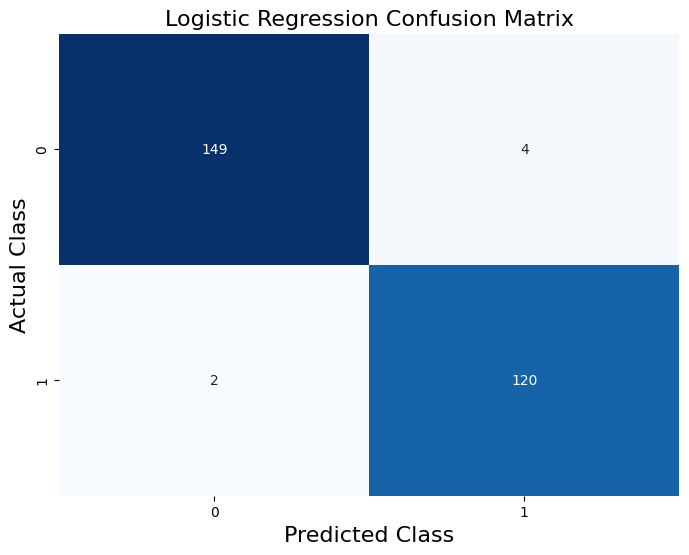

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_lreg)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title
plt.xlabel("Predicted Class", fontsize=16)
plt.ylabel("Actual Class", fontsize=16)
plt.title("Logistic Regression Confusion Matrix", fontsize=16)

# Show the plot
plt.show()
